# PW6 - Strom und Spannungsquellen


In [245]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from IPython.display import display, Markdown, Latex
import pandas as pd
from uncertainties import ufloat
from uncertainties import unumpy as unp


pd.set_option('display.float_format', '{:.2f}'.format)

## Solarzellen als Gleichstromquelle


### Aufbau und Durchführung

Um die Strom-Spannungs-Kennlinie einer Solarzelle bei zwei unterschiedlichen Intensitäten des einfallenden Lichts zu ermitteln, wird diese als Stromquelle in einem Gleichstromkreis untersucht. Ein verstellbarer Widerstand $R_L$ simuliert hierbei verschiedene Verbraucher. Über einen bekannten Widerstand $R_I$ wird die Stromstärke durch Spannungsmessung ermittelt, da der Innenwiderstand eines Amperemeters zu hoch ist um bei diesem Experiment von Nutzen zu sein. 

Es werden also zwei Spannungen gemessen: die Spannung $U$ die über den gesamten Stromkreis abfällt und die Spannung $U_I$, die über $R_I$ abfällt um den Strom $I$ zu ermitteln. 

Aus diesen Werten wird die Strom-Spannungs-Kennlinie, die Werte der Leerlaufspannung und des Kurzschlussstroms, sowie die Leistung $P$ als Funktion vom Widerstand $R$ aufgetragen. Es wird die maximale Leistung $P_{{max}}$ und der zugehörige Widerstand $R_{{L,max}}$ abgelesen und der $CFF$ Faktor berechnet

Im Anschluss wird der Abstand zwischen Lampe und Solarzelle verändert und das ganze für eine andere Lichtintensität wiederholt.

### Messgeräte und Unsicherheite

UNI-T-UT61B: 

* Spannung: 4V Messbereich; Auflösung: 0.001V; Unsicherheit: (0.5% + 1 Digit)
* Spannung: 400mV Messbereich; Auflösung: 0,1mV; Unsicherheit: (0.8% + 3 Digit)
* Widerstand: $(489\pm8)\Omega$



### Ergebnisse und Datenauswertung

Abstand zwischen Solarzelle und Lichtquelle: 15 cm

Der bekannte Widerstand hat einen Wert von $0.489+/-0.006$ $\Omega$.

Relative Unsicherheiten Stromstärke:

[[1.82019203 1.82092336 1.8216576  1.82239476 1.82313487 1.82387794
  1.82387794 1.82612509 1.82688018 1.82916381 1.84596053 1.87081522
  1.95978894 2.11070695 2.45084489 2.81552788 3.20263881 3.58087978
  3.78232835 4.17582342 4.58180662 4.80544062 5.00673094 5.2316349 ]]


,U [V],U Relativ,U_I [V],U_I Relativ,I [A],P [W]
0,0.105200,1.085171,0.005510,1.344465,0.011268,0.001185
1,0.138600,1.016450,0.005500,1.345455,0.011247,0.001559
2,0.351900,0.885251,0.005490,1.346448,0.011227,0.003951
3,0.596000,0.850336,0.005480,1.347445,0.011207,0.006679
4,0.817000,0.836720,0.005470,1.348446,0.011186,0.009139
5,1.052000,0.828517,0.005460,1.349451,0.011166,0.011746
6,1.288000,0.823292,0.005460,1.349451,0.011166,0.014381
7,1.569000,0.819120,0.005430,1.352486,0.011104,0.017423
8,1.761000,0.817036,0.005420,1.353506,0.011084,0.019519
9,2.017000,0.814874,0.005390,1.356586,0.011022,0.022232


$$U_{LL} = 3.15+/-0.03\,\text{V}$$

$$ I_{KS} = 0.0113+/-0.0006\,\text{A}$$

$$ P_{max} = 0.025+/-0.002\,\text{W}$$

$$ R_{L,max} = 252+/-16\,\Omega$$

$$ C_{FF} = 0.71+/-0.07$$

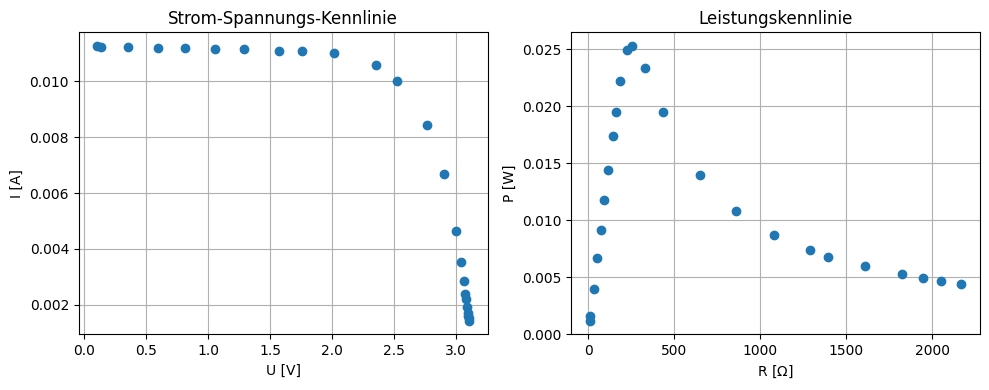

In [246]:
#intensität 15 cm
 
display(Markdown('Abstand zwischen Solarzelle und Lichtquelle: 15 cm'))

#U = np.array([3107, 3104, 3101, 3099, 3092, 3084, 3079, 3065, 3044, 3006, 2908, 2772, 2522, 2357, 2017, 1761, 1569, 1288, 1052, 817, 596, 351.9, 138.6, 105.2]) /1000         #mv --> V
U = np.array([105.2, 138.6, 351.9, 596, 817, 1052, 1288, 1569, 1761, 2017, 2357, 2522, 2772, 2908, 3006, 3044, 3065, 3079, 3084, 3092, 3099, 3101, 3104, 3107]) /1000
# +-*0.08 + 3
U_rel = ((U*0.008+0.0003)/U)*100 # relative Unsicherheit # mal 100 weil prozent



##uU = unp.uarray(U*1000, U*1000*0.008+1)/1000


#U_I = np.array([0.7, 0.74, 0.78, 0.83, 0.94, 1.08, 1.17, 1.39, 1.73, 2.27, 3.27, 4.12, 4.9, 5.18, 5.39, 5.42, 5.43, 5.46, 5.46, 5.47, 5.48, 5.49, 5.5, 5.51])/1000    #mv --> V # Spannung zum Strom berechnen #am innenwiderstand
U_I = np.array([5.51, 5.5, 5.49, 5.48, 5.47, 5.46, 5.46, 5.43, 5.42, 5.39, 5.18, 4.9, 4.12, 3.27, 2.27, 1.73, 1.39, 1.17, 1.08, 0.94, 0.83, 0.78, 0.74, 0.7])/1000
U_Irel = ((U_I*0.008+0.00003)/U_I)*100 # relative Unsicherheit

uU_I = unp.uarray([U_I*1000], [U_I*1000*0.008+0.03])/1000 # V
# +- *0.08 + 0.03

uR_I = ufloat(0.489, 0.006) #5%
Urel = 489/6 

R_I = 0.489 #ohm 
display(Markdown(rf'Der bekannte Widerstand hat einen Wert von ${uR_I}$ $\Omega$.'))

uI = uU_I / uR_I
I = U_I / R_I
I_rel = ((unp.std_devs(uI))/I) *100 # in prozent
display(Markdown('Relative Unsicherheiten Stromstärke:'))
print(I_rel)


# I = U_I / R_I #mA
# I_rel = unp.std_devs(uU_I/uR_I)/(U_I/R_I)*100 # relative Unsicherheit Strom #formel noch anschauen!!!
# print(I_rel)


P = U * I   #mW


R = U/I

I_k, I_d, I_r, _, I_std = linregress(U[:int(len(U)/3)], I[:int(len(U)/3)])

U_k, U_d, U_r, _, U_std = linregress(I[int(2*len(U)/3):], U[int(2*len(U)/3):])

I_KS = ufloat(I_d, I_d*0.053)
U_LL = ufloat(U_d, U_d*0.011)
#I_KS = ufloat(np.max(I),np.max(I)*0.1)
#U_LL = ufloat(np.max(U),np.max(U)*0.1)
idx_max = np.argmax(P)
U_opt = ufloat(U[idx_max], U[idx_max]*0.036) # als unsicherheit hier jeweils die höchste genomemn dann kann nix schief gehen. alternativ die unsicherheit von dem tatsächlichen Wert
I_opt = ufloat(I[idx_max], I[idx_max]*0.052)
P_max = ufloat(P[idx_max], P[idx_max]*0.08)
R_L_max = U_opt / I_opt
C_FF = P_max / (I_KS * U_LL)

data = {'U [V]': U, 'U Relativ': U_rel, 'U_I [V]': U_I, 'U_I Relativ': U_Irel, 'I [A]': I, 'P [W]': P}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte und berechnete Größen"))

display(Markdown(f"$$U_{{LL}} = {U_LL:.1u}\\,\\text{{V}}$$"))
display(Markdown(f"$$ I_{{KS}} = {I_KS:.1u}\\,\\text{{A}}$$"))
display(Markdown(f"$$ P_{{max}} = {P_max:.1u}\\,\\text{{W}}$$"))
display(Markdown(f"$$ R_{{L,max}} = {R_L_max:}\\,\\Omega$$"))
display(Markdown(f"$$ C_{{FF}} = {C_FF:.1u}$$"))

plt.figure(figsize=(10,4))
#plt.title('Abstand 15 cm') #evtl hinzufügen wenn wir noch den titel drin haben wollen 
plt.subplot(1,2,1)
plt.plot(U, I, 'o')
plt.xlabel('U [V]')
plt.ylabel('I [A]')
plt.title('Strom-Spannungs-Kennlinie')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(R, P, 'o')
plt.xlabel(r'R [$\Omega$]')
plt.ylabel('P [W]')
plt.title('Leistungskennlinie')
plt.grid(True)
plt.tight_layout()
plt.show()

Abstand zwischen Solarzelle und Lichtquelle: 7 cm

Relative Unsicherheiten Stromstärke:

[[1.59596814 1.59596814 1.59596814 1.59701353 1.59701353 1.59701353
  1.59701353 1.59701353 1.59807554 1.60600959 1.63484604 1.65846317
  1.73634723 1.88046243 2.04286361 2.20699817 2.34638316 2.75498791
  3.52072634 4.3116074  4.71253795 5.2316349 ]]


,U [V],U Relativ,U_I [V],U_I Relativ,I [A],P [W]
0,0.271800,1.903753,0.013600,1.020588,0.027812,0.007559
1,0.375000,1.600000,0.013600,1.020588,0.027812,0.010429
2,0.578000,1.319031,0.013600,1.020588,0.027812,0.016075
3,0.843000,1.155872,0.013500,1.022222,0.027607,0.023273
4,1.051000,1.085442,0.013500,1.022222,0.027607,0.029015
5,1.400000,1.014286,0.013500,1.022222,0.027607,0.038650
6,1.734000,0.973010,0.013500,1.022222,0.027607,0.047871
7,2.012000,0.949105,0.013500,1.022222,0.027607,0.055546
8,2.561000,0.917142,0.013400,1.023881,0.027403,0.070179
9,2.974000,0.900874,0.012700,1.036220,0.025971,0.077239


$$U_{LL} = 3.334+/-0.007\,\text{V}$$

$$ I_{KS} = 0.028+/-0.001\,\text{A}$$

$$ P_{max} = 0.077+/-0.005\,\text{W}$$

$$ R_{L,max} = 115+/-6\,\Omega$$

$$ C_{FF} = 0.83+/-0.07$$

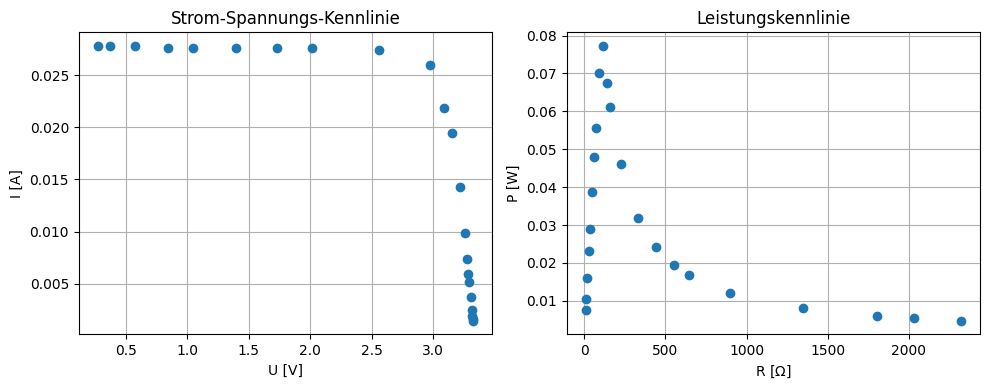

In [247]:
#intensität 7 cm same wie vorher basically

display(Markdown('Abstand zwischen Solarzelle und Lichtquelle: 7 cm'))

U = np.array([3324, 3320, 3318, 3313, 3303, 3293, 3285, 3273, 3255, 3215, 3153, 3090, 2974, 2561, 2012, 1734, 1400, 1051, 843, 578, 375, 271.8]) /1000         #mv
U = np.array([271.8, 375, 578, 843, 1051, 1400, 1734, 2012, 2561, 2974, 3090, 3153, 3215, 3255, 3273, 3285, 3293, 3303, 3313, 3318, 3320, 3324]) /1000
U_I = np.array([0.7, 0.8, 0.9, 1.2, 1.8, 2.5, 2.9, 3.6, 4.8, 7, 9.5, 10.7, 12.7, 13.4, 13.5, 13.5, 13.5, 13.5, 13.5, 13.6, 13.6, 13.6]) /1000    #mv
U_I = np.array([13.6, 13.6, 13.6, 13.5, 13.5, 13.5, 13.5, 13.5, 13.4, 12.7, 10.7, 9.5, 7, 4.8, 3.6, 2.9, 2.5, 1.8, 1.2, 0.9, 0.8, 0.7]) /1000
R_I = ufloat(0.489, 0.006) 
R_I = 0.489 #ohm
# +-*0.08 + 3
U_rel = ((U*0.008+0.003)/U)*100



##uU = unp.uarray(U*1000, U*1000*0.008+1)/1000
U_Irel = ((U_I*0.008+0.00003)/U_I)*100

uU_I = unp.uarray([U_I*1000], [U_I*1000*0.008+0.03])/1000
# +- *0.08 + 0.03

uR_I = ufloat(0.489,0.006) #5%
Urel = 489/6

R_I = 0.489 #ohm




uI = uU_I / uR_I
I = U_I / R_I
I_rel = ((unp.std_devs(uI))/I) *100 # in prozent
display(Markdown('Relative Unsicherheiten Stromstärke:'))
print(I_rel)


# I = U_I / R_I #mA
# I_rel = unp.std_devs(uU_I/uR_I)/(U_I/R_I)*100 # relative Unsicherheit Strom #formel noch anschauen!!!
# print(I_rel)


P = U * I   #mW


R = U/I

I_k, I_d, I_r, _, I_std = linregress(U[:int(len(U)/3)],I[:int(len(U)/3)])

U_k, U_d, U_r, _, U_std = linregress(I[int(2*len(U)/3):],U[int(2*len(U)/3):])

I_KS = ufloat(I_d,I_d*0.053)
U_LL = ufloat(U_d,U_d*0.002)
#I_KS = ufloat(np.max(I),np.max(I)*0.1)
#U_LL = ufloat(np.max(U),np.max(U)*0.1)
idx_max = np.argmax(P)
U_opt = ufloat(U[idx_max],U[idx_max]*0.01)
I_opt = ufloat(I[idx_max],I[idx_max]*0.052)
P_max = ufloat(P[idx_max],P[idx_max]*0.06)
R_L_max = U_opt / I_opt
C_FF = P_max / (I_KS * U_LL)

data = {'U [V]': U, 'U Relativ': U_rel, 'U_I [V]': U_I, 'U_I Relativ': U_Irel, 'I [A]': I, 'P [W]': P}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte und berechnete Größen"))

display(Markdown(f"$$U_{{LL}} = {U_LL:.1u}\\,\\text{{V}}$$"))
display(Markdown(f"$$ I_{{KS}} = {I_KS:.1u}\\,\\text{{A}}$$"))
display(Markdown(f"$$ P_{{max}} = {P_max:.1u}\\,\\text{{W}}$$"))
display(Markdown(f"$$ R_{{L,max}} = {R_L_max:.1u}\\,\\Omega$$"))
display(Markdown(f"$$ C_{{FF}} = {C_FF:.1u}$$"))

plt.figure(figsize=(10,4))
#plt.title('Abstand 7,5 cm') #evtl hinzufügen wenn wir noch den titel drin haben wollen 
plt.subplot(1,2,1)
plt.plot(U, I, 'o')
plt.xlabel('U [V]')
plt.ylabel('I [A]')
plt.title('Strom-Spannungs-Kennlinie')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(R, P, 'o')
plt.xlabel(r'R [$\Omega$]')
plt.ylabel('P [W]')
plt.title('Leistungskennlinie')
plt.grid(True)
plt.tight_layout()
plt.show()

### Diskussion

Die Strom-Spannungs-Kennlinien und Leistungskurven entsprechen den erwartebaren Kurven, die in der Versuchsanleitung angeführt sind. Die maximale Leistung ist bei dem Versuch mit höherer Lichtintensität gestiegen, was ebenfalls erwartbar ist. 

Für die Bestimmung von $U_{{LL}}$ und $I_{{KS}}$ wurde eine lineare Regression über die ersten bzw. letzten Werte gelegt, um so den Achsenschnittpunkt zu bestimmen.

Es wurde mit relativen Unsicherheiten gerechnet. Als Unsicherheiten zur Berechnung der Leistung $P_{{max}}$ und des maximalen Widerstandes $R_{{L,max}}$, sowie zur Bestimmung von $U_{{LL}}$ und $I_{{KS}}$, wurden die jeweils höchsten Unsicherheiten der Einzelwerte verwendet.

## Reale Spannungsquelle

### Aufbau und Durchführung

Bei diesem Versuch wird die Spannungskennlinie einer realen Spannungsquelle ermittelt, um daraus den Innenwiderstand $R_i$ zu berechnen. Dazu wird bei verschiedenen Widerständen Spannung und Stromstärke im Gleichstromkreis gemessen und mit diesen Werten über eine lineare Regressionsfunktion der Innenwiderstand $R_i$ und die Leerlaufspannung $U_0$ berechnet. Die Leerlaufspannung $U_0$ wird auch experimentell ermittelt und mit dem berechneten Wert verglichen.

### Messgeräte und Unsicherheiten

UNI-T-UT61B:

* Spannung: 4V Messbereich; Auflösung: 0.001V; Unsicherheit: (0.5% + 1 Digit)

* Strom: 40mA-400mA Messbereich; Auflösung: 0.1mA; Unsicherheit: (1.2% + 3 Digits)

### Ergebnisse und Auswertung

,I [A],U_KL [V]
0,0.007610,1.532000
1,0.008020,1.532000
2,0.008460,1.532000
3,0.008950,1.531000
4,0.009500,1.530000
5,0.010120,1.529000
6,0.010830,1.528000
7,0.011640,1.528000
8,0.012590,1.526000
9,0.013700,1.525000


$$U_{0,gemessen} = 1.55+/-0.01\,\text{V}$$

$$U_0 = 1.54+/-0.05\,\text{V}$$

$$R_i = 0.98+/-0.05\,\Omega$$

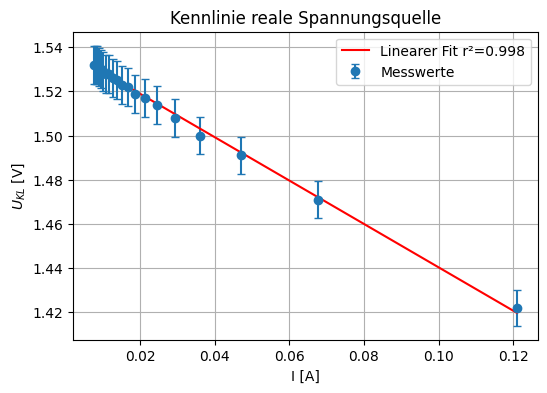

Die Steigung der Regressionsfunktion ist $-0.98$

In [248]:
# Kennlinie einer realen Spannungsquelle

I = np.array([7.61, 8.02, 8.46, 8.95, 9.5, 10.12, 10.83, 11.64, 12.59, 13.7, 15.03, 16.65, 18.66, 21.22, 24.59, 29.23, 36.05, 47.1, 67.8, 121]) /1000  # [mA]-->[A] Stromstärke
U_KL = np.array([1.532, 1.532, 1.532, 1.531, 1.530, 1.529, 1.528, 1.528, 1.526, 1.525, 1.523, 1.522, 1.519, 1.517, 1.514, 1.508, 1.500, 1.491, 1.471, 1.422])      # [V] Klemmspannung

uI = unp.uarray(I, I*0.012+0.0003) #1,2% # relative Unsicherheit
uU_KL = unp.uarray(U_KL, U_KL*0.005+0.001) #0.5% # relative Unsicherheit

U_KL_fehler = unp.std_devs(uU_KL)

#slope, intercept, r, p, stderr 
res = linregress(I, U_KL)
R_i = -ufloat(res.slope, -res.slope*0.05)
U_0 = ufloat(res.intercept,res.intercept_stderr) # nicht verwendet einf ignorieren
U_0 = ufloat(res.intercept,res.intercept*0.03) # berechneter Wert von U0 mit relativer unsicherheit von 3%
U_0m = ufloat(1.547, 1.547*0.005+0.001) #V; gemessener Wert von U0 mit Geräteunsicherheit

# 1.5 Volt batterie

data = {'I [A]': I, 'U_KL [V]': U_KL}
df = pd.DataFrame(data)
display(df.style.set_caption("Messwerte der realen Spannungsquelle"))

display(Markdown(f"$$U_{{0,gemessen}} = {U_0m:.2f}\\,\\text{{V}}$$"))
display(Markdown(f"$$U_0 = {U_0:.2f}\\,\\text{{V}}$$"))
display(Markdown(f"$$R_i = {R_i:.2f}\\,\\Omega$$"))


plt.figure(figsize=(6,4))
plt.errorbar(I, U_KL, yerr= U_KL_fehler, fmt='o', capsize=3, label='Messwerte') # evtl noch errorbar?
plt.plot(I, res.slope*I + res.intercept, 'r-', label=rf"Linearer Fit r²={res.rvalue**2:.3f}")
plt.xlabel('I [A]')
plt.ylabel('$U_{{KL}}$ [V]')
plt.title('Kennlinie reale Spannungsquelle')
plt.grid(True)
plt.legend()
plt.show()

display(Markdown(f"Die Steigung der Regressionsfunktion ist ${res.slope:.2f}$"))


## Diskussion

Für den Innenwiderstand $R_i$ der Batterie wurde, mittels der Steigung der linearen Regressionsfunktion, ein Wert von $(0.98\pm 0.05)\Omega$ ermittelt. Bei einem Vergleich mit Literaturwerten (https://www.akkuteile.de/batterien/duracell/duracell-plus-power-d-lr20-mn1300-duralock-2-stueck_190211_1362, 14.11.2025), ist dieser etwas hoch, das kann aber auch an dem Alter der Batterie liegen.

Als Quellenspannung $U_0$ wurde, mittels des Achsenschittpunkt der linearen Regressionsfunktion, ein Wert von $(1.54\pm 0.05)V$ ermittelt. Wobei als Unsicherheit nicht der Standardfehler aus der Regression genommen wurde, sondern ein relativer Wert von 3% der sich aus gaußscher Fehlerfortpflanzung ergibt. 
